# Import libraries and setup a few variables

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np

#import ArcGIS mapping libraries
from arcgis.gis import *
gis = GIS()

In [2]:
# setup directories
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')

print("Working Directory: " + dirWork)
print("Data Directory: "    + dirData)

Working Directory: E:\GitHub\Continuous-Count-Station-Data-Demo
Data Directory: E:\GitHub\Continuous-Count-Station-Data-Demo\data


In [3]:
# continuous count station shapefile path and filename
shpCcsStations = os.path.join(dirWork, r'data\Continuous_Count_Station_Locations\Continuous_Count_Station_Locations.shp')

# CCS data CSV file (must unzip first)
csvCcsData = os.path.join(dirWork, r'data\CCSHourDir_2013to2019.csv')

In [4]:
# a few settings to adjust/track

# set display of floats to commas
pd.options.display.float_format = '{:,.0f}'.format

# get defaults for max rows and columns when a dataframe is display
defaultMaxRows = pd.get_option('display.max_rows')
defaultMaxCols = pd.get_option('display.max_columns')

display('Max rows: ' + str(defaultMaxRows))
display('Max cols: ' + str(defaultMaxCols))

'Max rows: 60'

'Max cols: 20'

# Visualize station locations with shapefile

In [5]:
#create map1 that centers on Utah (can replace 'Utah' with any place name or leave blank for entire world)
map1 = gis.map('Utah')

#create spatially-enabled data frame from shapefile
sdfCcsStations = pd.DataFrame.spatial.from_featureclass(shpCcsStations)

#plot sdf using class breaks and blue colors for 'columnname' field
#layer will be added to 'map1' above
sdfCcsStations.spatial.plot(map_widget = map1)

#show map1
map1

MapView(layout=Layout(height='400px', width='100%'))

# Read in UDOT Continous Count Station hourly data

In [6]:
# read in data
# REMEMBER TO UNZIP FILE IF NEWLY CLONED REPOSITORY
dfCCS = pd.read_csv(csvCcsData)
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL
0,301,2013,1,1,1,0,N,358
1,301,2013,1,1,1,0,P,288
2,301,2013,1,1,1,1,N,435
3,301,2013,1,1,1,1,P,292
4,301,2013,1,1,1,2,N,277
...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494
9379251,716,2019,6,30,6,0,N,5032
9379252,716,2019,6,30,6,0,P,4707
9379253,716,2019,7,29,0,0,N,7037


In [7]:
# add a date field from year, month, day columns
dfCCS['DATE'] = pd.to_datetime(dict(year=dfCCS.YEAR, month=dfCCS.MONTH, day=dfCCS.DAY))
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL,DATE
0,301,2013,1,1,1,0,N,358,2013-01-01
1,301,2013,1,1,1,0,P,288,2013-01-01
2,301,2013,1,1,1,1,N,435,2013-01-01
3,301,2013,1,1,1,1,P,292,2013-01-01
4,301,2013,1,1,1,2,N,277,2013-01-01
...,...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494,2019-06-29
9379251,716,2019,6,30,6,0,N,5032,2019-06-30
9379252,716,2019,6,30,6,0,P,4707,2019-06-30
9379253,716,2019,7,29,0,0,N,7037,2019-07-29


In [8]:
# list stations
dfCCS['STATION'].unique()

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329,
       332, 333, 335, 340, 341, 348, 349, 350, 351, 353, 354, 355, 362,
       363, 382, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411,
       412, 414, 415, 416, 418, 420, 421, 424, 425, 427, 430, 431, 501,
       502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 601, 602,
       605, 606, 609, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648,
       649, 650, 651, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 665, 667, 669, 670, 671, 672, 674, 702, 703, 704, 711, 712,
       713, 714, 715, 716], dtype=int64)

# Check data by counting days of data in each month

In [9]:
#for checks and understanding
#calculate number of days with data per station per month

# calculate number of hours of data per day
dfCCS_days       = dfCCS     .groupby(['STATION','YEAR','MONTH','DAY'], as_index=False).agg(NUM_HOURS=('HOURVOL'  ,'size'))

# calculate number of days of data per monnth
dfCCS_days_month = dfCCS_days.groupby(['STATION','YEAR','MONTH'      ], as_index=False).agg(NUM_DAYS =('NUM_HOURS','size'))

# create pivot table to display 
dfCCS_days_month_pivot = dfCCS_days_month.pivot_table(index=['STATION'], columns=('YEAR','MONTH'), values='NUM_DAYS')#.reset_index()
dfCCS_days_month_pivot = dfCCS_days_month_pivot.fillna(0)

# display dataframe
display(dfCCS_days_month_pivot)

# export to CSV
##df_3.to_csv(os.path.join(dirIntermediate, r'StationMonthDays.csv'),index=False)

YEAR    2013                             ... 2019                           
MONTH     1  2  3  4  5  6  7  8  9  10  ...   3  4  5  6  7  8  9  10 11 12
STATION                                  ...                                
301       31 28 30 30 31 28 28 31 30 22  ...   31 29 29 30  0  7 28 31 30 31
302       31 28 30 30 31 30 31 29 30 31  ...   30 30 29 18 31 27 29 31 30 13
303       23 27 30 30 31 30 31 31 30 31  ...   30 30 31 30 31 31 29 31 30 28
304       31 28 30 30 31 30 31 31 30 31  ...   30 30 21 30 31 31 29 31 30 31
305       28 28 30 30 28 30 25 31 30 31  ...   30 30 31 30 31 27 29 31 30 31
...      ... .. .. .. .. .. .. .. .. ..  ...  ... .. .. .. .. .. .. .. .. ..
712        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 29 20 29 31 30 24
713        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 30 26 31 30 29
714        0  0  0  0  0  0  0  0  0  0  ...   30 30 21 30 31 31 29 31 30 31
715        0  0  0  0  0  0  0  0  0  0  ...   31 30 29 30  2  0  0  0  0  0
716        0  0  0  0  0  0  0  0  0  0  ...   31 30 26 30  1  0  0  0  0  0

[147 rows x 84 columns]

In [10]:
# show all dataframe

# set max rows and columns to none
pd.set_option('display.max_rows'   , None)
pd.set_option('display.max_columns', None)

# display dataframe
display(dfCCS_days_month_pivot)

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)
pd.set_option('display.max_columns', defaultMaxCols)

YEAR    2013                                  2014                             \
MONTH     1  2  3  4  5  6  7  8  9  10 11 12   1  2  3  4  5  6  7  8  9  10   
STATION                                                                         
301       31 28 30 30 31 28 28 31 30 22 30 31   31 28 30 30 31 29 29 29 28 31   
302       31 28 30 30 31 30 31 29 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
303       23 27 30 30 31 30 31 31 30 31 30 31   31 28 30 30 26  0 23 31 30 31   
304       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 29 30 31 30 31   
305       28 28 30 30 28 30 25 31 30 31 30 31   31 22 30 30 31 30 24 31 30 31   
306       30 25 30 30 31 30 31 31 30 31 30 31   31 28 30 30 30 30 30 31 30 31   
307       31 28 30 30 31 30 31 31 30 31 30 27   31 20 30 30 31 28 31 31 30 31   
308       31 28 30 30 31 30 30 31 30 31 29 28   31 28 30 30 31 30 31 31 30 31   
309       25 28 30 30 31 30 30 31 30 31 30 27   31 28 29 30 31 28 30 31 30 30   
310       31 27 30 30 30 22 31 31 30 31 30 31   31 28 29 30 31 29 31 31 30 31   
312       23 28 28 30 18 30 31 31 30 31 30 31   30 28 29 30 31 29 29 31 30 31   
313       31 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 30 25 31 30 26   
314       30 28 30 30 31 30 31 30 30 31 11 31   31 28 30 30 31 30 29 31 30 30   
315       30 28 29 30 31 29 31 31 30 31 30 31   31 28 30 30 31 29 31 31 30 31   
316       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29 31 30 31 31 30 31   
317       31 28 30 30 31 30 31 31 30 31 30 29   31 28 30 30 31 30 31 31 30 30   
318       27 28 30 30 31 30 31 31 30 31 30 26   31 28 29 30 31 28 31 31 30 31   
319       31 28 29 30 31 30 31 31 30 31 30 31   31 28 30 30 31 12 31 31 30 31   
320       24 28 30 30 22 18 27 30 26 29 30 28   31 25 30 30 31 24 30 29 30 31   
321       31 28 30 30 31 30 31 31 30 31 30 31   31 28 29 30 31 30 30 31 30 31   
322       31 28 30 30 31 30 27 30 30 25 30 31   31 28 30 30 31 30 31 31 30 31   
323       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
324       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31 30 31   
325       31 28 30 30 30 30 31 31 30 31 30 31   31 28 30 27 11 13 28 17 27 31   
327       31 28 29 30 31 30 31 31 30 31 30 31   30 28 30 30 31 30 31 30 30 31   
329       22 28 30 30 31 30 31 31 30 31 30 25   29 24 29 30 31 24 31 31 30 31   
332       31 25 30 30 22 30 31 31 30 15 23 27   19 28 26 28 25 28 23 31 30 31   
333       31 28 30 30 31 30 31 31 29 31 30 30   30 28 30 30 31 30 31 31 30 31   
335       31 28 30 30 31 30 29 28 30 27 30 29   30 28 30 30 31 29 29 31 30 31   
340       31 26 28 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 30 31 30 31   
341       31 28 30 30 31 29 30 31 30 31 30 31   31 28 29 30 30 17 29 30 30 31   
348       23 28 30 30 31 30 31 31 30 31 28 25   31 28 30 30 31 29 30 31 30 31   
349       31 28 30 30 30 30 31 31 30 31 29 31   31 28 30 30 31 30 30 31 30 31   
350       26 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 29 31 31 30 31   
351       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29  0 27 31 31 10 30   
353       31 28 30 30 30 30 31 31 30 31 30 30   31 28 29 30 31 29 23 31 30 31   
354       31 28 30 30 31 30 31 31 29 31 30 30   31 28 30 30 31 29 31 31 30 31   
355       31 28 30 30 31 30 31 31 30 31 30 31   31 18 30 30 31 30 31 31 30 31   
362       31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30  0  0 19 29   
363       31 28 30 30 31 30 31 27 30 31 30 31   31 28 29 30 31 30 31 31 30 31   
382       31 28 30 30 31 30 31 31 26 31 30 31   31 24 26 17 31 30 31 31 30 31   
400       31 26 29 30 30 30 31 31 28 29 29 31   31 28 27 27 31 29 30 31 30 30   
401       31 28 30 30 31 30 31 31 30 28 28 25   12 27 29 13 31 30 30 31 30 31   
402       31 28 30 30 31 30 31 31 29 30 26 27   29 24 29 30 31 30 30 31 30 31   
403       31 27 30 27 31 30 31 31 26 31 29 30   31 28 28 28 22 20 25 31 26 31   
404       31 28 30 30 31 30 31 27 27 31 30 31   31 28 31 30 31 30 31 31 30 31   
405       31 28 30 30 31 30 31 

In [11]:
# count number of months with more than 7 days of data

# add column that has a 1 if NUM_DAYS is greater than or equal to 7
dfCCS_days_month.loc[(dfCCS_days_month['NUM_DAYS']>=7), 'NUM_DAYS_7+'] = 1
dfCCS_days_month

,STATION,YEAR,MONTH,NUM_DAYS,NUM_DAYS_7+
0,301,2013,1,31,1
1,301,2013,2,28,1
2,301,2013,3,30,1
3,301,2013,4,30,1
4,301,2013,5,31,1
...,...,...,...,...,...
9139,716,2019,3,31,1
9140,716,2019,4,30,1
9141,716,2019,5,26,1
9142,716,2019,6,30,1


In [12]:
# pivot table and add up all months with more than 7 days of data
dfCCS_days_month_7p = pd.pivot_table(dfCCS_days_month, index='STATION', columns='YEAR', values='NUM_DAYS_7+', aggfunc=np.sum)

# set max rows and columns to none
pd.set_option('display.max_rows'   , None)

# display dataframe
display(display(dfCCS_days_month_7p))

# set max back to default
pd.set_option('display.max_rows'   , defaultMaxRows)

YEAR,2013,2014,2015,2016,2017,2018,2019
STATION,,,,,,,
301,12,12,12,12,12,12,11
302,12,12,12,10,12,12,12
303,12,11,12,12,12,12,12
304,12,12,12,12,12,12,12
305,12,12,12,12,12,12,12
306,12,12,12,12,12,12,12
307,12,12,12,12,12,12,12
308,12,12,12,12,12,12,12
309,12,12,12,12,12,12,7


None

# Calculate daily volumes from hourly

In [13]:
# for each station calculate daily volumes, num records reprsents number of hours x number of lanes x directions
dfCCS_DayVol = (dfCCS.groupby(['STATION','YEAR','MONTH','DAY','DATE'],as_index=False)
                     .agg(DAYVOL=('HOURVOL','sum'),NUMREC=('HOURVOL','size')))
display(dfCCS_DayVol)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
0,301,2013,1,1,2013-01-01,40215,48
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
4,301,2013,1,5,2013-01-05,47536,48
...,...,...,...,...,...,...,...
267758,716,2019,6,27,2019-06-27,17194,2
267759,716,2019,6,28,2019-06-28,17602,2
267760,716,2019,6,29,2019-06-29,15212,2
267761,716,2019,6,30,2019-06-30,9739,2


# Show only data for a handful of stations

In [14]:
# define lists for use in filtering
filterStations   = [301, 332, 612, 657, 712]
filterDaysOfWeek = [2,3,4] # (Monday=0,Sunday=6), [2,3,4] = Tuesday through Thursday
filterYears      = [2018,2019]

# filter data by station number, year, day of week
dfCCS_DayVol_fltr = dfCCS_DayVol[(dfCCS_DayVol['STATION']           .isin(filterStations) ) &
                                 (dfCCS_DayVol['YEAR'   ]           .isin(filterYears)    ) &
                                 (dfCCS_DayVol['DATE'   ].dt.weekday.isin(filterDaysOfWeek))].copy()
display(dfCCS_DayVol_fltr)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
1783,301,2018,1,3,2018-01-03,59090,2
1784,301,2018,1,4,2018-01-04,59998,2
1785,301,2018,1,5,2018-01-05,64234,2
1790,301,2018,1,10,2018-01-10,52226,2
1791,301,2018,1,11,2018-01-11,58705,2
...,...,...,...,...,...,...,...
263176,712,2019,12,11,2019-12-11,5262,2
263177,712,2019,12,12,2019-12-12,5478,2
263179,712,2019,12,18,2019-12-18,5190,2
263180,712,2019,12,19,2019-12-19,6163,2


In [15]:
# aggregate by station and month and calculate monthly stats for each
dfMonthStats = dfCCS_DayVol_fltr.groupby(['STATION','YEAR','MONTH']).agg(AVGVOL =('DAYVOL','mean'  ),
                                                                         MEDVOL =('DAYVOL','median'),
                                                                         MINVOL =('DAYVOL','min'   ),
                                                                         MAXVOL =('DAYVOL','max'   ),
                                                                         STDEV  =('DAYVOL','std'   ),
                                                                         NUMDAYS=('DAYVOL','count' ))
display(dfMonthStats)


AVGVOL  MEDVOL  MINVOL  MAXVOL  STDEV  NUMDAYS
STATION YEAR MONTH                                                
301     2018 1      60,591  59,998   52226   67730  4,036       13
             2      58,158  58,190   50040   64463  3,838       12
             3      58,955  59,040   53623   65043  3,435       13
             4      55,228  55,667   50897   60506  2,619       11
             5      60,318  60,030   53671   69156  3,607       14
...                    ...     ...     ...     ...    ...      ...
712     2019 8       4,470   4,424    4398    4683     93        9
             9       4,691   4,562    4306    5353    341       12
             10      5,613   5,574    5340    6128    230       14
             11      5,177   5,564    2890    6034    976       13
             12      5,434   5,314    5190    6163    314        8

[101 rows x 6 columns]

## Plot histograms for selected stations

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

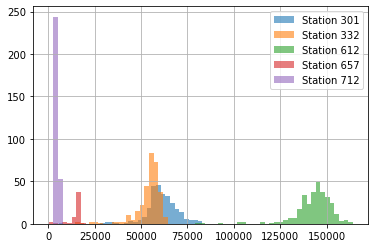

In [16]:
# make histogram of volumes by station
_binwidth = 2500

# loop through all stations in the filterStations list
for s in filterStations:
    
    # get DAYVOL column for a given s station
    data = dfCCS_DayVol_fltr[dfCCS_DayVol_fltr['STATION']==s]['DAYVOL']
    
    # rename object so name appears correctly in legend
    data.name = "Station " + str(s)
    
    # display histogram, bins set from min to max with width of _binwidth, alpha sets opacity
    display(data.hist(bins=range(min(data), max(data) + _binwidth, _binwidth),alpha=0.6, legend=True))

## Boxplots for specific stations

<AxesSubplot:>

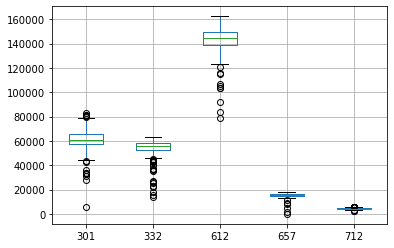

In [17]:
# convert selected data to wide format with STATION as column
dfCCS_DayVol_fltr_wide = dfCCS_DayVol_fltr.pivot(index='DATE', columns='STATION', values='DAYVOL')

# create box plot
plot = dfCCS_DayVol_fltr_wide.boxplot(column=filterStations)
display(plot)